In [58]:
# Import the packages needed for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Load the data and see the columns and 5 rows. Spending Score (1-100)
# Score assigned by the mall based on customer behavior and spending nature

df=pd.read_csv("Mall_Customers.csv")
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [60]:
# Check how many columns and rows are in the data

df.shape

(200, 5)

In [61]:
# Use summary statistics to describe the data

df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [62]:
# To check data types which includes integers and object
# Int64 in Python which stands for 64 bit integer. The 64 refers to the memory allocated to store data in each cell 
# which effectively relates to how many digits it can store in each “cell”. 
# In short, a number which is not a fraction; a whole number.

df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [63]:
# To check if there are null values (A null value in a relational database is used when the value 
# in a column is unknown or missing. A null is neither an empty string )

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [64]:
# Since customer ID is not important component of the analysis. It will be dropped or removed

df.drop(["CustomerID"],axis=1, inplace=True)

In [65]:
# Check the columns if customer ID is removed

df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

Text(0.5, 1.0, 'Correlation Factors Heat Map')

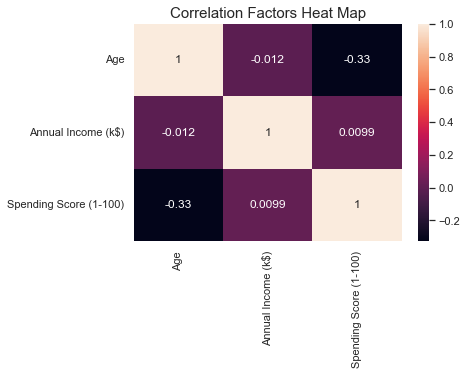

In [66]:
# Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend 
# between the two variables. The close to 1 the correlation is the more positively correlated they are;
# that is as one increases so does the other and the closer to 1 the stronger this relationship is.

sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', size='15')

C:\Users\Ricardo S. Biason\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ricardo S. Biason\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ricardo S. Biason\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version

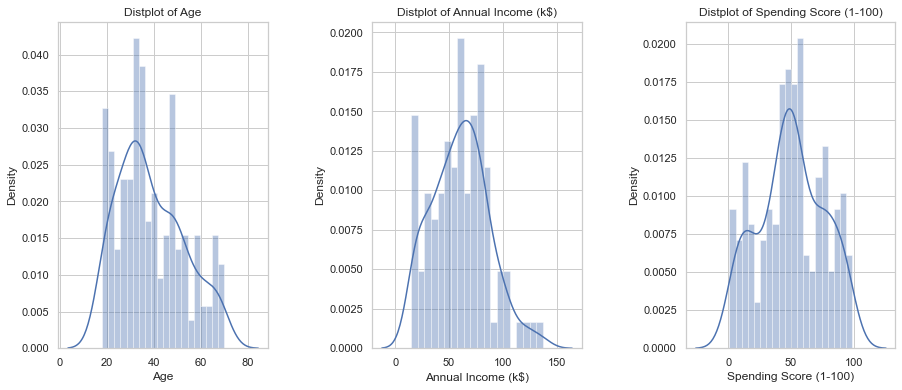

In [52]:
# Plot the Age, Annual Income and Spending score in a distribution plot to see the density of each.

plt.figure(1, figsize=(15,6))
n=0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}' .format(x))
plt.show()

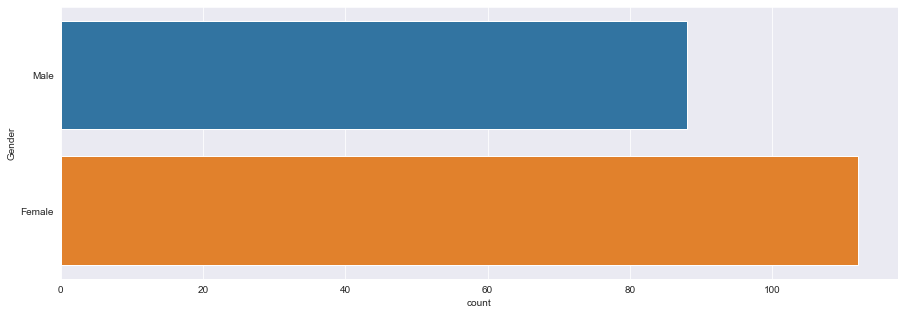

In [27]:
# Plot the number of males and females using a horizontal bar plot

plt.figure(figsize=(15,5))
sns.countplot(y='Gender' ,data=df)
plt.show()

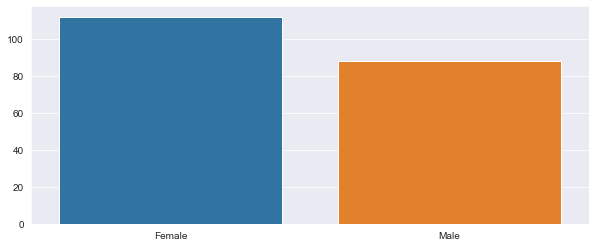

In [28]:
# Or Use a vertical bar plot the number of males and females

genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

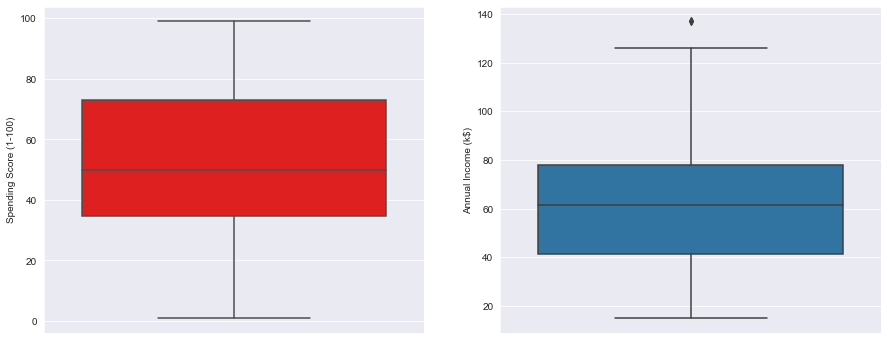

In [29]:
# Create a box plot of spending score and annual income to better visualize the distribution range. 
# The range of spending score is clearly more than the annual income range.

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

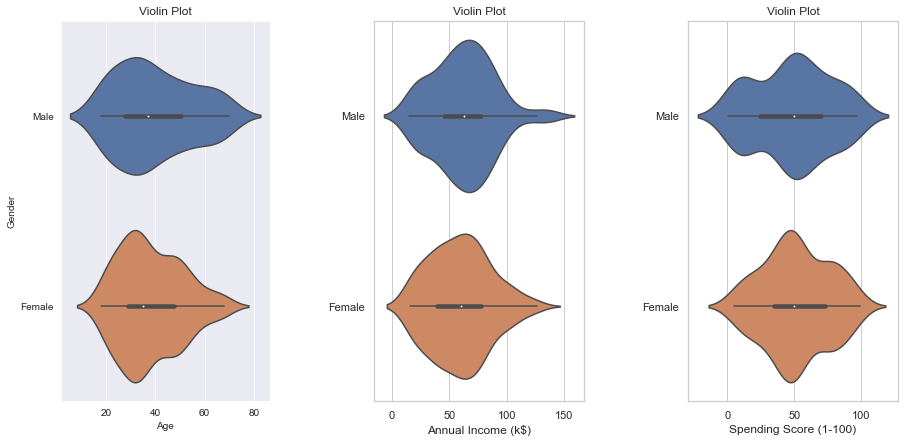

In [31]:
# Differentiate males and females Age, Annual income and spending score using violin plot
# A Bivariate Analysis between the Gender and the Annual Income, 
# to better visualize the Income of the different Genders.
# There are more number of males who get paid more than females. 
# But, The number of males and females are equal in number when it comes to low annual income.

plt.figure(1, figsize=(15,7))
n=0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df )
    plt.ylabel('Gender' if n == 1 else ' ')
    plt.title('Violin Plot')
plt.show()

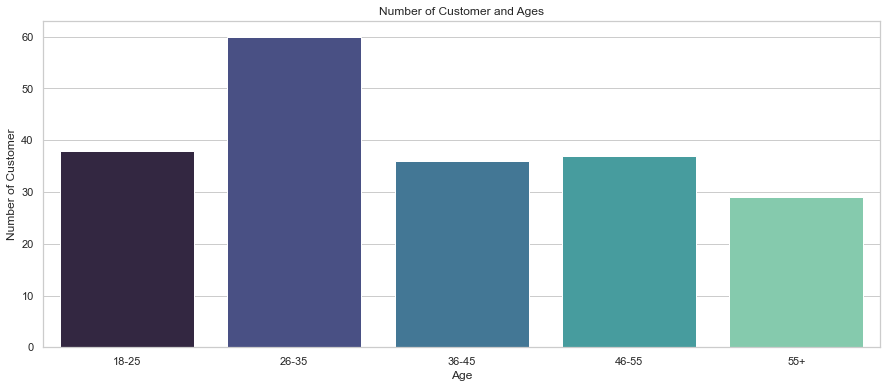

In [32]:
# Segment the number of customers based on age

age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 56]

agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

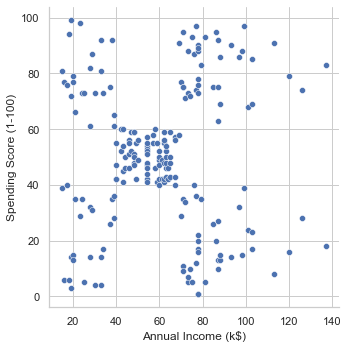

In [33]:
# We will use a scatter plot to understand the relationship between Annual Income and Spending Score

sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

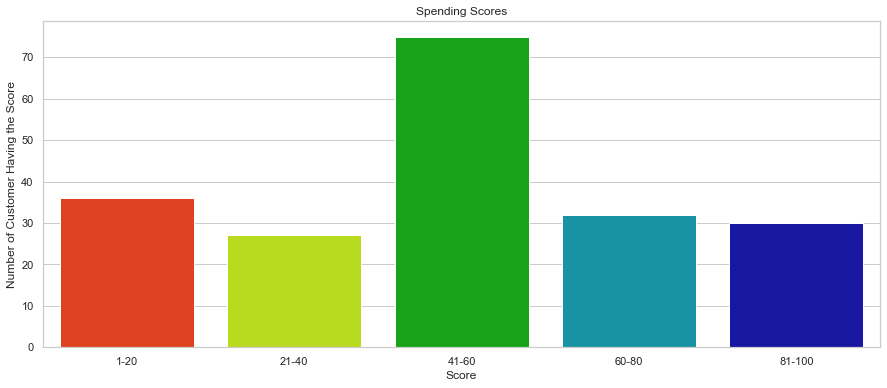

In [34]:
# Divide Spending Score into different categories (Palette "rocket")

ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "60-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

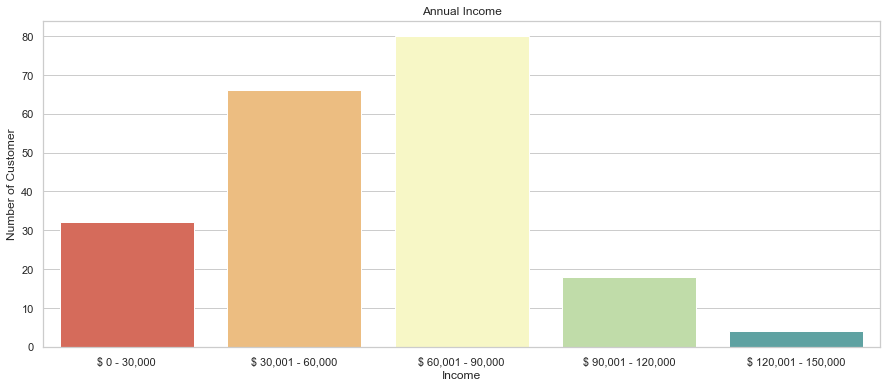

In [69]:
# Divide Annual Income into different categories

ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values) ]
plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()


In [37]:
from sklearn.cluster import KMeans

Plot the Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.

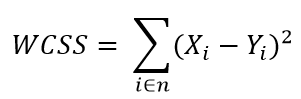

Where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

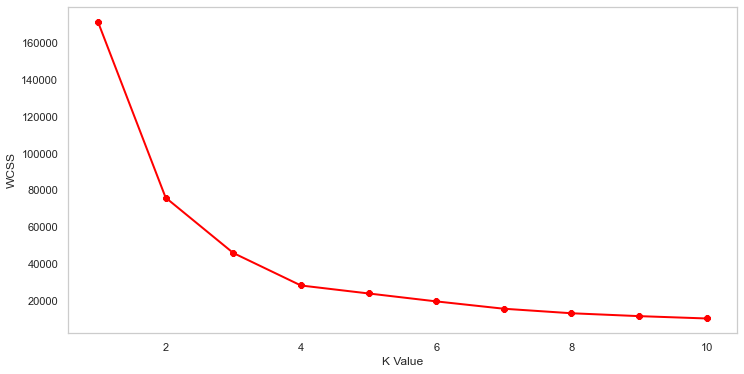

In [36]:
# To understand the optimum number of clusters by using the WCSS = within clusters sum of squares
# The optimal K value is found to be 4 using the elbow method.
# Minimize the distance between points in a cluster and simultaneously maximize the distance between clusters
# The term k in K-Means refers to the number of clusters. Therefore, we have to find the best value of k that we will use for modeling. We can use the Elbow Plot method. 
# The value of k taken is the value of k which is in the angular position of the arm.

X1=df.loc[:, ["Age","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [38]:
# There is a bend at 4 which is the optimum clusters

kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)


[2 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 2 2 1 0 2 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1
 0 1 0 3 0 3 2 1 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 0 2 0 3 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 2 0 1 0 3 0
 1 0 1 0 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 2
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [39]:
# The data is divided into 4 clusters which is 0, 1, 2, 3. Let us check the centroids x and y coordinates.

print(kmeans.cluster_centers_)


[[30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]]


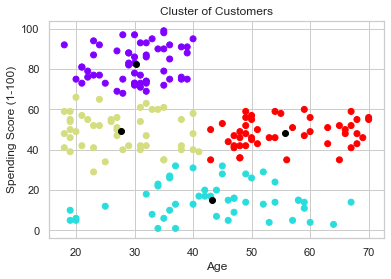

In [40]:
# To visualize the centroids in a graph and see the 4 clusters

plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title("Cluster of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

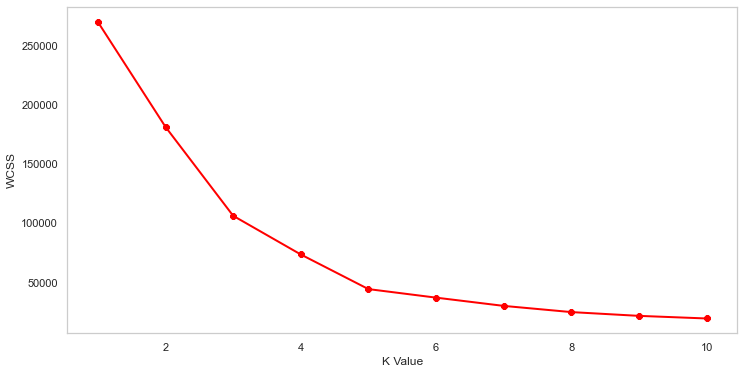

In [41]:
# To cluster Annual Income and Spending Score. To see the optimum number of clusters

X2=df.loc[:, ["Annual Income (k$)","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [42]:
# There is a bend at 5 which is the optimum clusters

kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 1 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 0 4 1 4 0 4 0 4 1 4 0 4 0 4 0 4 0 4 1 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]


In [43]:
# The data is divided into 5 clusters which is 0, 1, 2, 3 and 4. Let us check the centroids x and y coordinates.

print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]]


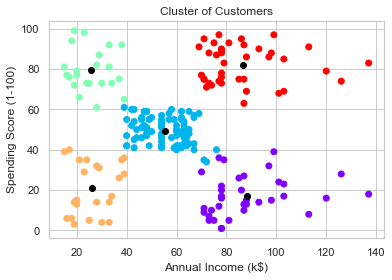

In [44]:
# To visualize the centroids in a graph and see the 5 clusters

plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title("Cluster of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

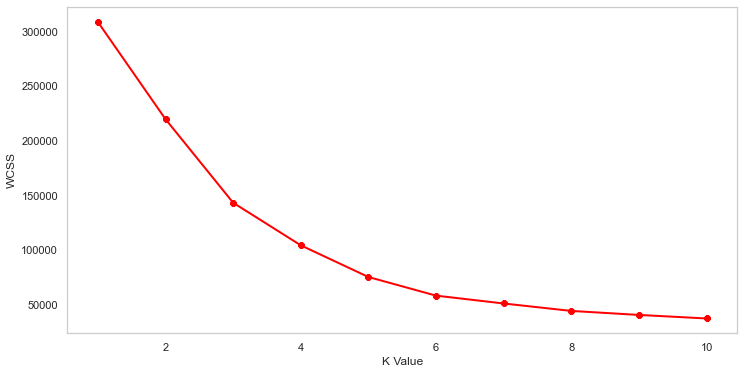

In [45]:
# To visualize 3 variables

X3=df.iloc[:,1:]

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [46]:
# There is a bend at 5 which is the optimum clusters

kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X3)
print(label)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [47]:
# View centriods of 5 clusters. Included Age, Annual Income and Spending Score)
print(kmeans.cluster_centers_)

[[40.66666667 87.75       17.58333333]
 [43.08860759 55.29113924 49.56962025]
 [45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [25.52173913 26.30434783 78.56521739]]


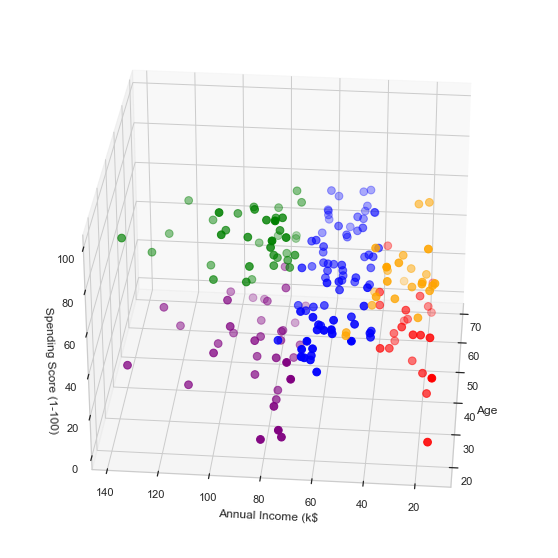

In [67]:
# Since we used three variables we will use a 3D graph

clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)        
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)         
ax.view_init(30, 185)   
           
plt.xlabel("Age")
plt.ylabel("Annual Income (k$")
ax.set_zlabel("Spending Score (1-100)")
           
plt.show()